# **TUTORIAL NEUROKIT2: SEÑALES DE ECG**

Por:
- Marie Bernal
- Isabella Vásquez

## **1. Generalidades:**

**¿Qué es? y ¿Por qué se utiliza?:** Neurokit2 se denomina "La caja de herramientas de Python para el procesamiento de señales neurofisiológicas", por lo que es una librería de python que brinda un acceso sencillo a rutinas avanzadas de procesamiento de bioseñales. En terminos generales brinda un conjunto completo de rutinas de procesamiento para una variedad de señales biológicas tales como ECG y EMG [1].

**¿Para qué se utiliza?**

Neurokit2 incluye funciones para realizar un procesamiento general de señales com ECG.Estas funciones pueden incluir filtrado, remuestreo, detección de picos, entre otros y los parámetros de las mismas pueden cambiarse ccon el fin de elegir, por ejemplo, el método de filtrado, frecuencia de muestreo y orden [1].  

También, cuenta con otras funciones que son independientes para cada tipo de señal biológica y pueden utilizarse en el procesamiento específico de señales commo en la limpieza, clasificación de fase o cálculo de frecuencia [1].


**Importancia:** es una herramienta útil de gran importancia dado que  investigadores y médicos que no cuenta con conocimientos extensos en la programación en python o en el procesamiento de señales biomédicas, puede implementar esta herramienta con solo dos líneas de código y utilizarla para analizar datos fisiológicos como el ECG [1].

**¿Cómo implementarlo?:**

Ahora que conoces las generalidades de esta librería, iniciemos este tutorial reconociendo como puedes instalarla para empezar a utilizarla.

## **2. Instalación**:

Inicia ubicando en la terminal el siguiente comando: *pip install neurokit2*

Al finalizar la instalación, puedes importar la libería a través del siguiente comando *import neurokit2 as nk*

Revisa el proceso mencionado anteriormente en las siguientes líneas de código:



In [ ]:
pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import neurokit2 as nk

# Otras librerías que ya estan instaladas y que se utilizarán en el desarrollo del tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Conexión con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**3. ¿Qué quieres implementar?**

Posterior a la instalación, debes determinar que deseas hacer: **Procesamiento de alguna señal o extracción de características de la misma**.

En caso de que necesitas hacer las dos, **iniciaremos explicando el procesamiento de una señal**. Recuerda que en este tutorial nos centraremos en señales de ECG, por lo que inicialmente realizaremos la extracción de una señal cruda (no procesada) de dos patologías: Fibrilación Auricular (la llamaremos AFIB) y Bradicardia Sinusal (la llamaremos SB)

In [ ]:
# Extracción de un archivo de cada patología

# Derivaciones (columnas del dataframe)
names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
# Ruta de la carpeta
ruta_carpeta = '/content/drive/MyDrive/Bioseñales/ECGData'

# Nombre de cada archivo
nombre_archivo_SB = 'MUSE_20180116_172000_19000.csv'
nombre_archivo_AFIB = 'MUSE_20180114_121533_70000.csv'

# Ruta de cada archivo
ruta_AFIB = os.path.join(ruta_carpeta, nombre_archivo_AFIB)
ruta_SB = os.path.join(ruta_carpeta, nombre_archivo_SB)


try:
  # Se lee el dataframe
  data_frame_SB = pd.read_csv(ruta_SB, delimiter=',', names=names)
  # eliminando la primera fila del dataframe
  data_un_SB = data_frame_SB.drop(data_frame_SB.index[0])
  # Señal con la transformación. El parámetro errors rellena con NaN los valores que no se pudieron transformar
  signal_un_SB = pd.to_numeric(data_un_SB["II"].values, errors='coerce')
except FileNotFoundError:
  print(f'El archivo {nombre_archivo_SB} no se encontró en {ruta_carpeta}.')

try:
  data_frame_AFIB = pd.read_csv(ruta_AFIB, delimiter=',', names=names)
  # eliminando la primera fila del dataframe
  data_un_AFIB = data_frame_AFIB.drop(data_frame_AFIB.index[0])
  # Señal con la transformación. El parámetro errors rellena con NaN los valores que no se pudieron transformar
  signal_un_AFIB = pd.to_numeric(data_un_AFIB["II"].values, errors='coerce')
except FileNotFoundError:
  print(f'El archivo {nombre_archivo_AFIB} no se encontró en {ruta_carpeta}.')

In [ ]:
signal_un_AFIB

array([-200.08, -219.6 , -258.64, ...,  -14.64,  -19.52,  -48.8 ])

In [ ]:
signal_un_SB

array([24.4 , 14.64,  4.88, ..., 34.16, 29.28, 39.04])

##**3.1. Procesamiento de señales de ECG:**

Para realizar el procesamiento de una señal de ECG, se puede utilizar la función **ecg_process** la cual nos permite:

- Limpieza de la señal (usando ecg_clean())
- Detección de picos (usando ecg_peaks())
- Cálculo de frecuencia cardíaca (usando signal_rate())
- Evaluación de la calidad de la señal (usando ecg_quality())
- Delineación del complejo QRS (usando ecg_delineate())
- Determinación de la fase cardíaca (usando ecg_phase()).

También existen otras salidas de esta función que puedes consultarlas en el siguiente link: [ecg_process](https://neuropsychology.github.io/NeuroKit/functions/ecg.html#preprocessing)

La implementación de esta función es muy simple y se muestra a continuación para las dos patologías.

El parámetro **sampling_rate** se refiere a la frecuencia de muestreo, el cual depende de como se adquirió la señal. En este caso, este fué un valor dado en la base de datos en la que se extrajo.

El parámetro **method** nos permite elegir el método procesamiento utilizado para la limpieza de señales y la detección de picos. Dado que este es un tutorial para el uso de Neurokit, se utilizará este como el valor de este parámetro, pero puedes utilizar otros como:

- 'pantompkins1985'
- 'hamilton2002'
- 'elgendi2010'
- 'engzeemod2012'.

In [ ]:
signal_SB_process, info_SB = nk.ecg_process(signal_un_SB, sampling_rate=500, method='neurokit')
signal_AFIB_process, info_AFIB = nk.ecg_process(signal_un_AFIB, sampling_rate=500, method='neurokit')

Para visualizar algunas de las salidas que nos retorna la función mencionada anteriormente, se puede utilizar otra función denominada **ecg_plot**, la cual tiene como parámetros las salidas de la función **ecg_process**.

Respecto a estas salidas, puedes imprimir **signal_SB_process** o **signal_AFIB_process** para identificar cada una de las características de la señal (como la frecuencia cardiaca) y la señal limpiad en un dataframe.

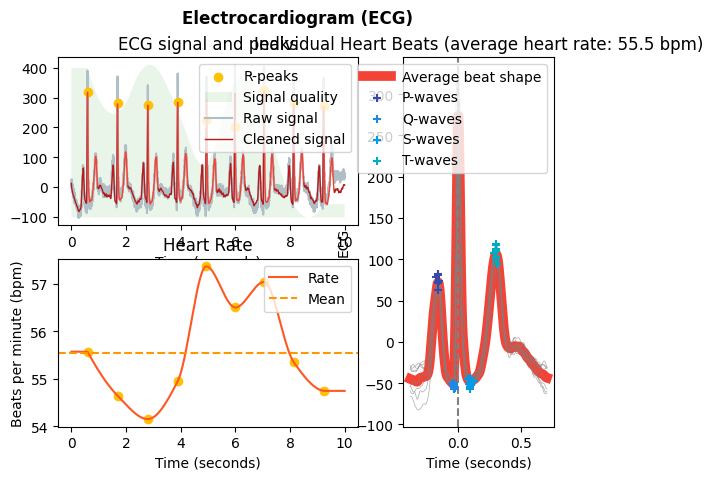

In [ ]:
nk.ecg_plot(signal_SB_process, info_SB)

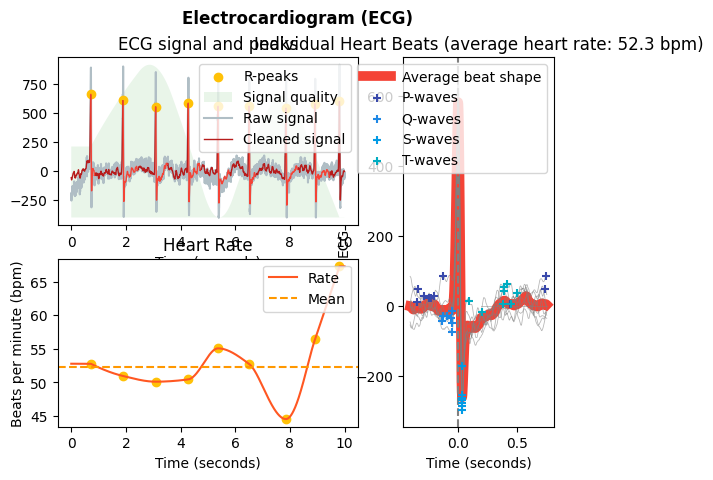

In [ ]:
nk.ecg_plot(signal_AFIB_process, info_AFIB)

Como se ve en las dos imágenes anteriores (la primera para SB y la segunda para AFIB), esta simple función permitió filtrar la señal (primera imágen parte superior izquierda) por lo que es ideal para el procesamiento de la misma.

Así mismo, esta función es muy versátil, dado que nos ayudó con la búsqueda y selección de los picos, nos calculó la frecuencia cardíaca, entre otras características. Sin embargo, en la siguiente sección revisaremos que otras funciones pueden implementarse para extraer aún más características con Neurokit2.

## **3.2. Extracción de Características**

**3.2.1. Variabilidad de la frecuencia cardíaca (HRV)**

Para extraer este conjunto de caracteristicas, el cual puede dar indicios de problemas cardíacos [2], se utiliza la función **nk.hrv**, la cual utiliza como parámetros tanto el sampling_rate (frecuencua de muestreo) como los picos de la señal. Para hallar los picos de la señal, como lo vimos en la sección 3.1 es posible hacerlo con la función ecg_process, sin embargo, en este caso utilizaremos una función denominada **nk.ecg_peaks** que es específica para extraer este característica. La implementación de estas dos funciones se muestre a continuación.


In [ ]:
# Señales de SB y AFIB ya filtradas (sección 3.1)
signal_SB_clean = signal_SB_process["ECG_Clean"].values
signal_AFIB_clean = signal_AFIB_process["ECG_Clean"].values

In [ ]:
# Función para encontrar los picos de una señal, la cual tiene como parámetros:
# La señal ya procesada
# La frecuencia de muestreo
signals_SB, rpeaks_SB = nk.ecg_peaks(signal_SB_clean, sampling_rate=500, correct_artifacts=False)
signals_AFIB, rpeaks_AFIB = nk.ecg_peaks(signal_AFIB_clean, sampling_rate=500, correct_artifacts=False)

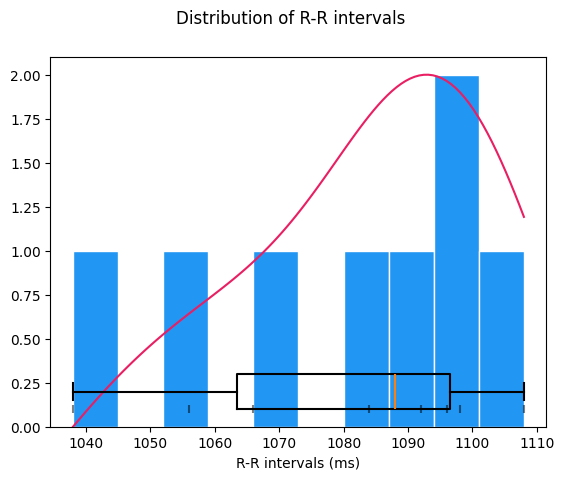

In [ ]:
# Función para encontrar características asociadas a la variación de la frecuencia cardíaca. Esta función tiene los siguiente parámetros
# Picos de la señal
# La frecuencia de muestreo
# El parámetro show te permite, cuando toma el valor de True, ver la distribución de los intervalos RR
hrv_SB = nk.hrv_time(rpeaks_SB, sampling_rate=500, show=True)

In [ ]:
# Algunas características que se pueden extraer aplicando la función anterior
print(f'Valor de MeanNN para SB: {hrv_SB["HRV_MeanNN"].values[0]}')
print(f'Valor de MedianNN para SB: {hrv_SB["HRV_MedianNN"].values[0]}')
print(f'Valor de MinNN para SB: {hrv_SB["HRV_MinNN"].values[0]}')
print(f'Valor de MaxNN para SB: {hrv_SB["HRV_MaxNN"].values[0]}')
print(f'Valor de SDNN para SB: {hrv_SB["HRV_SDNN"].values[0]}')

Valor de MeanNN para SB: 1079.75
Valor de MedianNN para SB: 1088.0
Valor de MinNN para SB: 1038.0
Valor de MaxNN para SB: 1108.0
Valor de SDNN para SB: 24.08170615692691


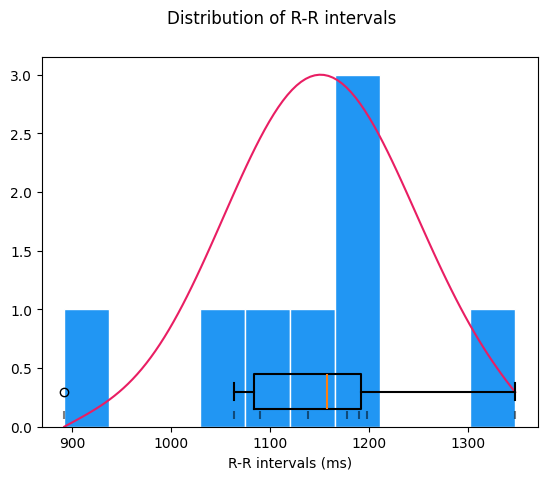

In [ ]:
hrv_AFIB = nk.hrv_time(rpeaks_AFIB, sampling_rate=500, show=True)

In [ ]:
# Algunas características que se pueden extraer aplicando la función anterior
print(f'Valor de MeanNN para AFIB: {hrv_AFIB["HRV_MeanNN"].values}')
print(f'Valor de MedianNN para AFIB: {hrv_AFIB["HRV_MedianNN"].values}')
print(f'Valor de MinNN para AFIB: {hrv_AFIB["HRV_MinNN"].values}')
print(f'Valor de MaxNN para AFIB: {hrv_AFIB["HRV_MaxNN"].values}')
print(f'Valor de SDNN para AFIB: {hrv_AFIB["HRV_SDNN"].values}')

Valor de MeanNN para AFIB: [1137.25]
Valor de MedianNN para AFIB: [1158.]
Valor de MinNN para AFIB: [892.]
Valor de MaxNN para AFIB: [1348.]
Valor de SDNN para AFIB: [131.09184349]


Te preguntarás, ¿qué características se pueden extraer con esta función?

Esta función se basa principalmente en el análisis en tiempo de los intervalos RR de un ECG, el cual se mide desde el inicio de una onda R hasta el inicio de la onda R siguiente [3]. Según lo anterior, las características que se pueden extraer de este análisis en tiempo pueden ser muchas e incluyen las siguientes:

- MeanNN : La media de los intervalos RR.
- MedianNN: La mediana de los intervalos RR
- pNN50 : Porcentaje de diferencias absolutas en intervalos RR sucesivos
- MinNN : El mínimo de los intervalos RR
- MaxNN : El máximo de los intervalos RR

Ahora, si quieres conocer más sobre las características que se pueden extraer de esta función puedes revisar el siguiente link [HRV](https://neuropsychology.github.io/NeuroKit/functions/hrv.html) e imprimir la salida de la función, la cual es un dataframe en donde cada columna es una característica.

**3.2.2. Entropía de Shannon**

Para extraer esta característica, la cual nos da información sobre la complejidad de un sistema, se utiliza la función **nk.entropy_shannon** la cual tiene como argumentos la señal procesada y **symbolize**, el cual es un parámetro que permite discretizar la señal y puede tener un valor variable según la aplicación que decidas. En este caso, el valor mencionado anteriormente se decidió en 3 dado a que es un valor que permite reconocer diferencias significativas entre los dos grupos, es decir, permite reconocer que para AFIB se tiene un mayor valor de entropía que para SB dada la aleatoriedad de las frecuencias en la primera patología.

La función puede inmplementarse de la siguiente forma como se muestra:

0.7172497084670277

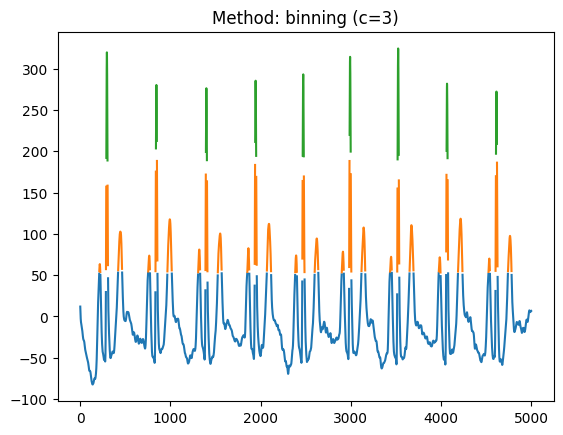

In [ ]:
# La función permite encontrar el valor de la entropía de shannon para cierta señal
shanen_SB, info_SB = nk.entropy_shannon(signal_SB_clean, symbolize=3, show=True)
# Imprimiendo el valor para la entropía de shannon para el grupo con SB
shanen_SB

0.8611947570975623

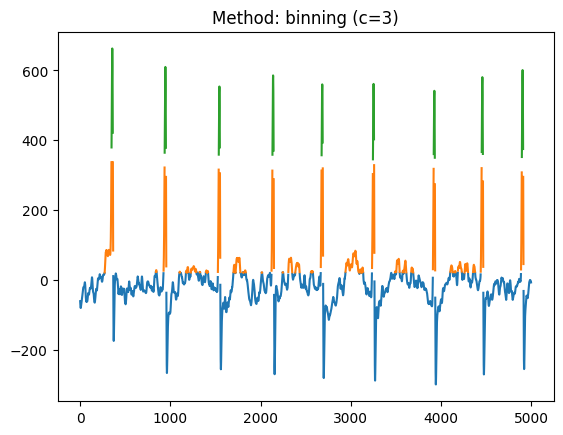

In [ ]:
shanen_AFIB, info_AFIB = nk.entropy_shannon(signal_AFIB_clean, symbolize=3, show=True)
# Imprimiendo el valor para la entropía de shannon para el grupo con AFIB
shanen_AFIB

**3.2.3. Frecuencia cardiaca media**

La frecuencia cardiaca media puede extraerse a partir del procesamiento hecho en la sección 3.1, utilizando el ECG Rate y calculando su promedio. A continuación se muestra como puede implementarse

In [ ]:
ecg_rate_SB = signal_SB_process['ECG_Rate'].values
heart_rate_mean_SB = np.mean(ecg_rate_SB)
print(f'Frecuencia cardiaca media para SB: {heart_rate_mean_SB}')
ecg_rate_AFIB = signal_AFIB_process['ECG_Rate'].values
heart_rate_mean_AFIB = np.mean(ecg_rate_AFIB)
print(f'Frecuencia cardiaca media para AFIB: {heart_rate_mean_AFIB}')

Frecuencia cardiaca media para SB: 55.54255449737619
Frecuencia cardiaca media para AFIB: 52.295170728223134


##**4. ¿Qué usos tiene?**

Haz finalizado este tutorial y queremos contarte qué podrías hacer con las características extraídas anteriormente.

Inicialmente, podrías analizar una por una, para reconocer características entre dos grupos, por ejemplo, entre pacientes sanos y pacientes con cierta patología o, como en nuestro caso, entre pacientes con SB y AFIB.

También podrías utilizar estas características para diseñar una red neuronal con el fin de tener un sistema capaz de clasificar entre dos grupos.

Así que esto es todo y esperamos que este tutorial fuera lo suficientemente claro para entender el uso de Neurokit2.

Recuerda que si quieres más detalles, conocer más funciones y demás, puedes consultar en el siguiente link:
[Más información Neurokit2](https://https://neuropsychology.github.io/NeuroKit/introduction.html)


#**Referencias:**

[1] Makowski, D., Pham, T., Lau, Z. J., Brammer, J. C., Lespinasse, F., Pham, H., Schölzel, C., & Chen, S. A. (2021). NeuroKit2: A Python toolbox for neurophysiological signal processing. Behavior Research Methods, 53(4), 1689-1696. https://doi.org/10.3758/s13428-020-01516-y.

[2] Pham, T., Lau, Z. J., Chen, S. H. A., & Makowski, D. (2021). Heart Rate Variability in Psychology: A Review of HRV Indices and an Analysis Tutorial. Sensors, 21(12), 3998. https://doi.org/10.3390/s21123998

[3] Intervalos y segmentos del electrocardiograma. (s. f.). https://www.my-ekg.com/generalidades-ekg/intervalos-segmentos-ekg.html

